In [1]:
#Ensure the project is on sys.path
import sys
from pathlib import Path

Project_root = Path().resolve().parent
if str(Project_root) not in sys.path:
    sys.path.append(str(Project_root))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.models import lhv_correlation, chsh, chsh_standard_angles

# Local Hidden-Variable (LHV) Simulation

## Aim
To implement a local realistic (EPR-style) hidden-variable model and compute correlations
$$
E(a,b)=\langle AB\rangle
$$
via Monte Carlo sampling. We then compute the CHSH parameter
$$
S = E(a,b)+E(a,b')+E(a',b)-E(a',b')
$$
and verify that the local realist bound
$$
|S|\le 2
$$
is always satisfied, independent of sample size.


In [3]:
#Define Settings
a, ap, b, bp = chsh_standard_angles()
a, ap, b, bp

(0.0, 1.5707963267948966, 0.7853981633974483, -0.7853981633974483)

In [6]:
E_ab = lhv_correlation(a,b, N = 200000, seed = 1)
E_abp = lhv_correlation(a,bp, N = 200000, seed = 2)
E_apb = lhv_correlation(ap,b, N = 200000, seed = 3)
E_apbp = lhv_correlation(ap,bp, N = 200000, seed = 4)

S_lhv = chsh(E_ab, E_abp, E_apb, E_apbp)

E_ab, E_abp, E_apb, E_apbp, S_lhv

(-0.49524, -0.50007, -0.50069, 0.49749, -1.99349)

In [7]:
Ns = [5000, 20000, 80000, 200000]

rows = []
for N in Ns:
    E_ab   = lhv_correlation(a, b,   N=N, seed=1)
    E_abp  = lhv_correlation(a, bp,  N=N, seed=2)
    E_apb  = lhv_correlation(ap, b,  N=N, seed=3)
    E_apbp = lhv_correlation(ap, bp, N=N, seed=4)
    S = chsh(E_ab, E_abp, E_apb, E_apbp)
    rows.append((N, E_ab, E_abp, E_apb, E_apbp, S))

rows


[(5000, -0.4852, -0.4812, -0.5052, 0.4944, -1.966),
 (20000, -0.4966, -0.5085, -0.4975, 0.4952, -1.9977999999999998),
 (80000, -0.493825, -0.50055, -0.50065, 0.4988, -1.9938250000000002),
 (200000, -0.49524, -0.50007, -0.50069, 0.49749, -1.99349)]

In [8]:
print("N\t\tE(a,b)\t\tE(a,b')\t\tE(a',b)\t\tE(a',b')\t\tS")
for r in rows:
    print(f"{r[0]:<8}\t{r[1]:+.4f}\t\t{r[2]:+.4f}\t\t{r[3]:+.4f}\t\t{r[4]:+.4f}\t\t{r[5]:+.4f}")


N		E(a,b)		E(a,b')		E(a',b)		E(a',b')		S
5000    	-0.4852		-0.4812		-0.5052		+0.4944		-1.9660
20000   	-0.4966		-0.5085		-0.4975		+0.4952		-1.9978
80000   	-0.4938		-0.5006		-0.5007		+0.4988		-1.9938
200000  	-0.4952		-0.5001		-0.5007		+0.4975		-1.9935


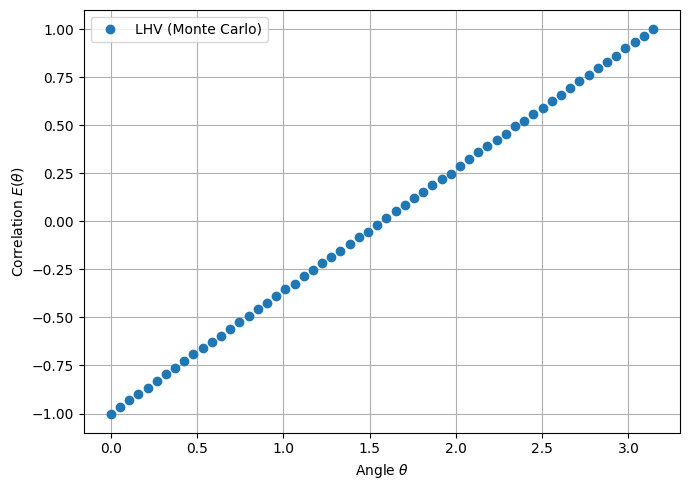

In [9]:
angles = np.linspace(0, np.pi, 60)

E_lhv = []
for i, th in enumerate(angles):
    E_lhv.append(lhv_correlation(0.0, th, N=120_000, seed=100+i))

plt.figure(figsize=(7,5))
plt.plot(angles, E_lhv, 'o', label='LHV (Monte Carlo)')
plt.xlabel(r'Angle $\theta$')
plt.ylabel(r'Correlation $E(\theta)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("../figures/lhv_correlation_vs_angle.png", dpi=200)
plt.show()


## Interpretation

- The LHV model encodes **realism** via predetermined outcomes $A(a,\lambda)$ and $B(b,\lambda)$.
- **Locality** is enforced because $A$ depends only on $a$ and $\lambda$, and $B$ depends only on $b$ and $\lambda$.
- The correlation is computed by Monte Carlo sampling, which approximates Bell’s integral over hidden variables.
- Increasing sample size reduces statistical noise but does not change the Bell constraint.
- The CHSH value satisfies $|S|\le 2$ for all runs, confirming the Bell–CHSH bound for local realism.
